In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uncertainties import *
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

from uncertainties import ufloat
from uncertainties import umath
from scipy.optimize import curve_fit
import scipy as sp
sns.set_theme(style="darkgrid")
sns.set_context("paper")

## Cosine law

In [17]:
# read in data
df=pd.read_csv("LambertschesGesetz.csv")

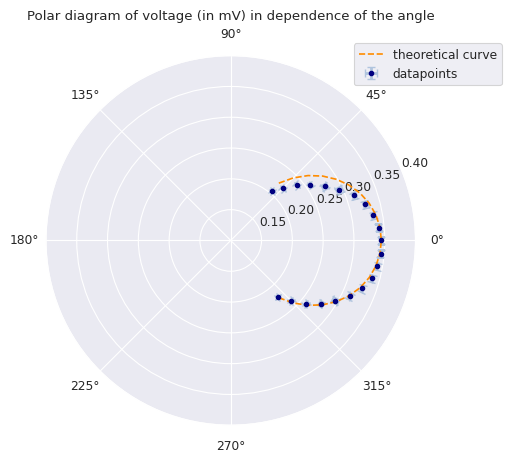

In [18]:
theta = df['Winkel'] * np.pi/180
e_theta = np.sqrt(2) * np.pi/180
r = (df['Spannung 1'] + df['Spannung 2'])/2
e_r = abs(df['Spannung 1'] - r)

plt.axes(projection='polar')
plt.title("Polar diagram of voltage (in mV) in dependence of the angle")
plt.errorbar(theta, r, xerr= e_theta, yerr=e_r, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")
plt.plot(theta, r.max()*np.cos(theta), color = 'darkorange', ls = '--', label="theoretical curve")
plt.ylim((0.1, 0.4))
plt.legend(bbox_to_anchor=(1.25, 1.05))
plt.savefig("polarplot.png", dpi=500, bbox_inches='tight')
plt.show()

## Emitted radiation

In [19]:
# read in data, experimental parameters and constants (if needed)
df=pd.read_csv('EmittiereteStrahlung.csv')

d = ufloat(0.115, 0.0014) # distance between detector and aperture in m
r_aperture = ufloat(0.015, 0.0014) / 2 # radius of the aperture in m
r_detector = ufloat(0.032, 0.0014) / 2 # radius of the detector in m
epsilon = ufloat(30, 10) * 10**(-6) # nominal sensitivity in V

In [20]:
volt = df['Spannung'] * 10**(-3) #in V
e_volt = 0.001 * 10**(-3) #in V

volt_data = []
for i in range(len(volt)):
    volt_data.append(ufloat(volt[i],e_volt))
#volt_data

Compute from U the emitted radiation

$U = \dfrac{\epsilon E}{A_{Det}} \cdot \dfrac{A_{aperture}}{d^2} \Longrightarrow \dfrac{E}{A_{Det}} = \dfrac{U \cdot d^2}{\epsilon \cdot A_{aperture}}$

In [21]:
E_per_unit_area = (volt * d**2)/(epsilon*(r_aperture**2)*np.pi)

E_per_unit_area_nominal = np.zeros(len(E_per_unit_area))
E_per_unit_area_err = np.zeros(len(E_per_unit_area))

for i in range(len(E_per_unit_area_nominal)):
    E_per_unit_area_nominal[i] = E_per_unit_area[i].n
for i in range(len(E_per_unit_area_err)):
    E_per_unit_area_err[i] = E_per_unit_area[i].s


<ErrorbarContainer object of 3 artists>

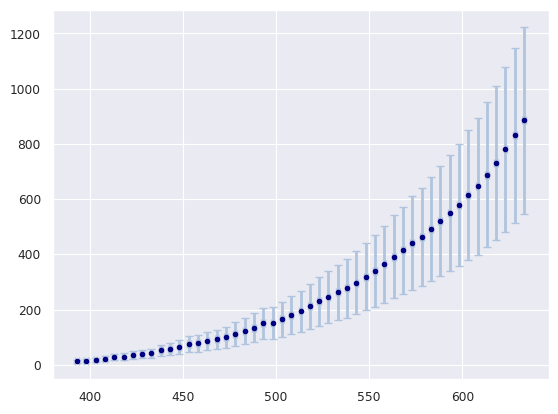

In [22]:
# plot E vs T

temp = df['Temperatur'] + 273.15 #in K
temp0 = 298.15 #room temp in K
e_temp = 1 #in K

plt.errorbar(temp, E_per_unit_area_nominal, xerr= e_temp, yerr=E_per_unit_area_err, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datapoints")

In [23]:
def sbl(temp, sigma):
    return sigma*(temp**4)

popt, pcov = sp.optimize.curve_fit(sbl, (temp-temp0), E_per_unit_area_nominal)#, sigma=E_per_unit_area_err)

In [24]:
print("σ = ", popt[0], "+/-", np.sqrt(pcov[0][0]))

σ =  7.294307225384827e-08 +/- 8.296458277119213e-10


In [51]:
# calculate sigma for theoretical U plot
sigma_u = popt[0] * 1/(d**2/(epsilon*(r_aperture**2)*np.pi))
sigma_u

1.4230702072144688e-10+/-5.447745692166141e-11

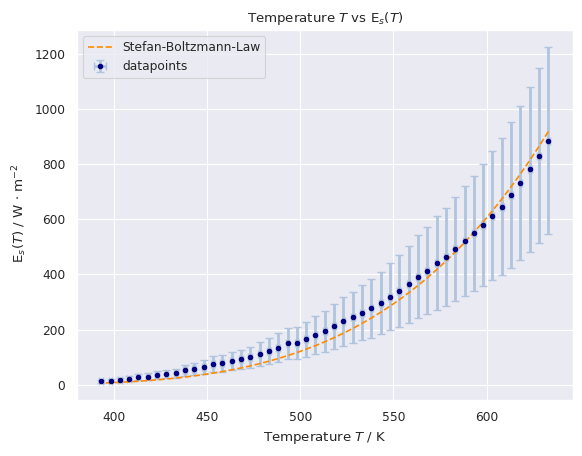

In [26]:
plt.title("Temperature $T$ vs E$_s$($T$)")
plt.errorbar(temp, E_per_unit_area_nominal, xerr= e_temp, yerr=E_per_unit_area_err, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")
plt.plot(temp, sbl((temp-temp0), popt), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law")

plt.xlabel("Temperature $T$ / K")
plt.ylabel(" E$_s$($T$) / W $\cdot$ m$^{-2}$")

plt.legend()
plt.savefig("EvsT.png", dpi=500, bbox_inches='tight')
plt.show()

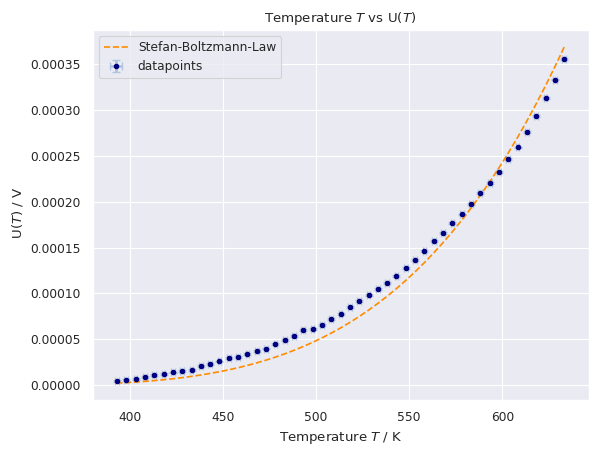

2.924031350790406e-14 3.3257584761699974e-16


In [27]:
plt.title("Temperature $T$ vs U($T$)")
plt.errorbar(temp, volt, xerr= e_temp, yerr = e_volt, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")

def sbl(temp, sigma):
    return sigma*(temp**4)

poptU, pcovU = sp.optimize.curve_fit(sbl, (temp-temp0), volt)
plt.plot(temp, sbl((temp-temp0), poptU), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law")
plt.xlabel("Temperature $T$ / K")
plt.ylabel(" U($T$) / V")

plt.legend()
plt.savefig("UT.png", dpi=500, bbox_inches='tight')
plt.show()
print(poptU[0], np.sqrt(pcovU[0][0]))

In [28]:
#def log_fit(temp, sigma):
#    return np.log10(sigma) + np.log10(temp**4 - temp0**4)

In [29]:
#popt2, pcov2 = sp.optimize.curve_fit(log_fit, temp, np.log10(E_per_unit_area_nominal))

In [30]:
#popt2

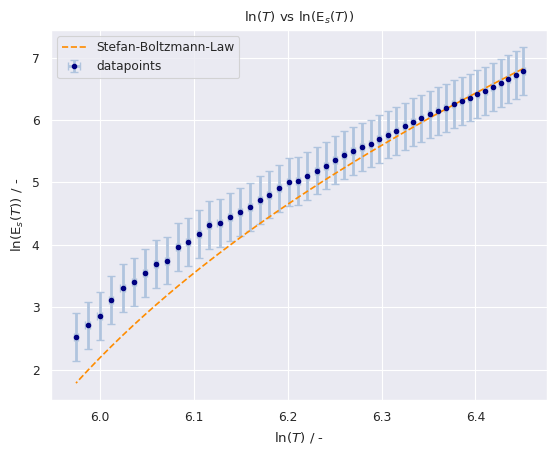

In [47]:
plt.title("ln($T$) vs ln(E$_s$($T$))")
plt.errorbar(np.log(temp), np.log(E_per_unit_area_nominal), xerr=e_temp/temp, yerr=E_per_unit_area_err/E_per_unit_area_nominal, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")
plt.plot(np.log(temp), np.log(sbl((temp-temp0), popt)), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law")
#plt.plot(np.log10(temp), log_fit(temp, popt2), color="lightgrey", ls = '--', label="direct fit")

plt.xlabel("ln($T$) / -")
plt.ylabel("ln(E$_s$($T$)) / -")

plt.legend()
plt.savefig("logEvsT.png", dpi=500, bbox_inches='tight')
plt.show()

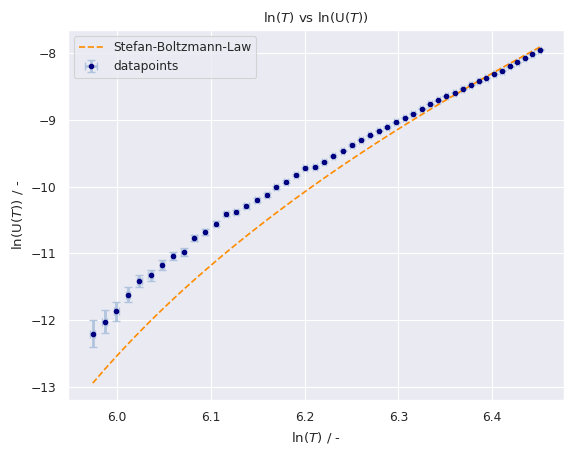

In [48]:
plt.title("ln($T$) vs ln(U($T$))")
plt.errorbar(np.log(temp), np.log(volt), xerr=e_temp/temp, yerr=e_volt/volt, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")
plt.plot(np.log(temp), np.log(sbl((temp-temp0), poptU)), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law")
#plt.plot(np.log10(temp), log_fit(temp, popt2), color="lightgrey", ls = '--', label="direct fit")

plt.xlabel("ln($T$) / -")
plt.ylabel("ln(U($T$)) / -")

plt.legend()
plt.savefig("logUT.png", dpi=500, bbox_inches='tight')
plt.show()

In [33]:
dE_vs_dT_nominal = np.zeros(len(E_per_unit_area))
dE_vs_dT_err = np.zeros(len(E_per_unit_area))
for i in range(len(E_per_unit_area_nominal) - 1):
    dE_vs_dT_nominal[i] = (E_per_unit_area_nominal[i+1] - E_per_unit_area_nominal[i])/(temp[i+1] - temp[i])

dE_vs_dT_nominal = dE_vs_dT_nominal[dE_vs_dT_nominal != 0]

print(dE_vs_dT_nominal, len(dE_vs_dT_nominal))

[10.97626802  9.97842547  9.97842547  8.48166165  8.48166165  6.48597655
  6.98489783  5.98705528  5.48813401  5.98705528  5.48813401  4.49029146
  5.48813401  4.49029146  5.48813401  4.98921273  3.99137019  4.49029146
  3.99137019  2.99352764  3.49244891  2.99352764  3.49244891  3.49244891
  2.99352764  2.99352764  2.49460637  0.49892127  2.99352764  2.49460637
  1.99568509  2.49460637  1.49676382  1.49676382  1.49676382  0.49892127
  1.99568509  1.49676382  0.99784255  1.99568509  0.49892127  0.99784255
  0.99784255  0.49892127  0.99784255  0.99784255  0.49892127  0.49892127] 48


In [34]:
dU_vs_dT_nominal = np.zeros(len(volt))
dU_vs_dT_err = np.zeros(len(volt))
for i in range(len(volt) - 1):
    dU_vs_dT_nominal[i] = (volt[i+1] - volt[i])/(temp[i+1] - temp[i])

dU_vs_dT_nominal = dU_vs_dT_nominal[dU_vs_dT_nominal != 0]

print(dU_vs_dT_nominal, len(dU_vs_dT_nominal))

for i in range(len(volt) - 1):
    dU_vs_dT_err[i] = np.sqrt(2)/(temp[i+1] - temp[i])

dU_vs_dT_err = dU_vs_dT_err[dU_vs_dT_err != 0]
dU_vs_dT_err

[4.4e-06 4.0e-06 4.0e-06 3.4e-06 3.4e-06 2.6e-06 2.8e-06 2.4e-06 2.2e-06
 2.4e-06 2.2e-06 1.8e-06 2.2e-06 1.8e-06 2.2e-06 2.0e-06 1.6e-06 1.8e-06
 1.6e-06 1.2e-06 1.4e-06 1.2e-06 1.4e-06 1.4e-06 1.2e-06 1.2e-06 1.0e-06
 2.0e-07 1.2e-06 1.0e-06 8.0e-07 1.0e-06 6.0e-07 6.0e-07 6.0e-07 2.0e-07
 8.0e-07 6.0e-07 4.0e-07 8.0e-07 2.0e-07 4.0e-07 4.0e-07 2.0e-07 4.0e-07
 4.0e-07 2.0e-07 2.0e-07] 48


array([-0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271, -0.28284271, -0.28284271,
       -0.28284271, -0.28284271, -0.28284271])

In [35]:
for i in range(len(E_per_unit_area_err) - 1):
    dE_vs_dT_err[i] = (E_per_unit_area_err[i+1] - E_per_unit_area_err[i])/(temp[i+1] - temp[i])

dE_vs_dT_err = dE_vs_dT_err[dE_vs_dT_err != 0]
dE_vs_dT_err

array([4.20189506, 3.8199046 , 3.8199046 , 3.24691891, 3.24691891,
       2.48293799, 2.67393322, 2.29194276, 2.10094753, 2.29194276,
       2.10094753, 1.71895707, 2.10094753, 1.71895707, 2.10094753,
       1.9099523 , 1.52796184, 1.71895707, 1.52796184, 1.14597138,
       1.33696661, 1.14597138, 1.33696661, 1.33696661, 1.14597138,
       1.14597138, 0.95497615, 0.19099523, 1.14597138, 0.95497615,
       0.76398092, 0.95497615, 0.57298569, 0.57298569, 0.57298569,
       0.19099523, 0.76398092, 0.57298569, 0.38199046, 0.76398092,
       0.19099523, 0.38199046, 0.38199046, 0.19099523, 0.38199046,
       0.38199046, 0.19099523, 0.19099523])

In [36]:
T_avg = np.zeros(len(dE_vs_dT_nominal))
tempcorr = temp - temp0 #correct temperature for roomtemp (otherwise axes are wrong)
for i in range(len(T_avg)):
    T_avg[i] = (tempcorr[i+1] + tempcorr[i])/2
T_avg

array([332.5, 327.5, 322.5, 317.5, 312.5, 307.5, 302.5, 297.5, 292.5,
       287.5, 282.5, 277.5, 272.5, 267.5, 262.5, 257.5, 252.5, 247.5,
       242.5, 237.5, 232.5, 227.5, 222.5, 217.5, 212.5, 207.5, 202.5,
       197.5, 192.5, 187.5, 182.5, 177.5, 172.5, 167.5, 162.5, 157.5,
       152.5, 147.5, 142.5, 137.5, 132.5, 127.5, 122.5, 117.5, 112.5,
       107.5, 102.5,  97.5])

NameError: name 'popt2' is not defined

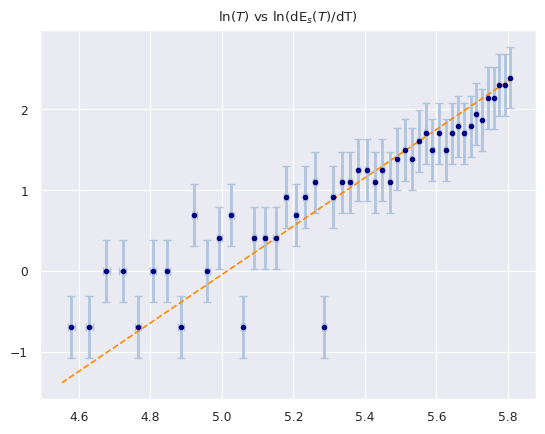

In [37]:
plt.title("ln($T$) vs ln(dE$_s$($T$)/dT)")
plt.errorbar(np.log(T_avg), np.log(dE_vs_dT_nominal), xerr=e_temp/T_avg, yerr=dE_vs_dT_err/dE_vs_dT_nominal, markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")

def lin_sbl(temp, sigma):
    return 3 * np.log(temp) + np.log(4*sigma) 

plt.plot(np.log(temp - temp0),lin_sbl((temp-temp0), popt), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law (original plot)")
plt.plot(np.log(temp - temp0),lin_sbl((temp-temp0), popt2), color="grey", ls = '--', label="Stefan-Boltzmann-Law (direct fit)")


plt.xlabel("ln($T$) / -")
plt.ylabel("ln(E$_s$($T$)) / -")

plt.legend()
plt.savefig("logdEdTvsT.png", dpi=500, bbox_inches='tight')
plt.show()

In [38]:
popt2, pcov2 = sp.optimize.curve_fit(lin_sbl, T_avg, np.log(dE_vs_dT_nominal))

/tmp/ipykernel_410/420285180.py:5: RuntimeWarning: invalid value encountered in log
  return 3 * np.log(temp) + np.log(4*sigma)


In [39]:
print("σ = ", popt2[0], "+/-", np.sqrt(pcov2[0][0]))

σ =  7.770042761846975e-08 +/- 4.7871354742525446e-09


/home/lukaslinux/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


σ =  1.0 +/- inf


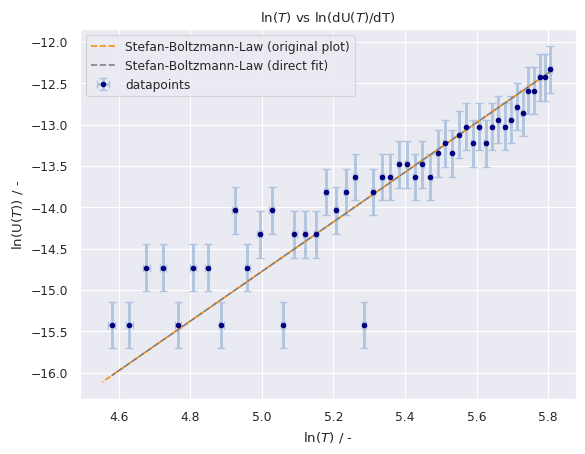

In [45]:
plt.title("ln($T$) vs ln(dU($T$)/dT)")
plt.errorbar(np.log(T_avg), np.log(dU_vs_dT_nominal), xerr=e_temp/T_avg, yerr=abs(dU_vs_dT_err), markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="datapoints")

def lin_sbl(temp, sigma):
    return 3 * np.log(temp) + np.log(4*poptU[0]) 

poptU2, pcovU2 = sp.optimize.curve_fit(lin_sbl, T_avg, np.log(dU_vs_dT_nominal))
print("σ = ", poptU2[0], "+/-", np.sqrt(pcovU2[0][0]))

plt.plot(np.log(temp - temp0),lin_sbl((temp-temp0), poptU), color="darkorange", ls = '--', label="Stefan-Boltzmann-Law (original plot)")
plt.plot(np.log(T_avg),lin_sbl((T_avg), poptU2), color="grey", ls = '--', label="Stefan-Boltzmann-Law (direct fit)")

plt.xlabel("ln($T$) / -")
plt.ylabel("ln(U($T$)) / -")

plt.legend()
plt.savefig("logdUdTvsT.png", dpi=500, bbox_inches='tight')
plt.show()